In [ ]:
import numpy as np
import pandas as pd
import shap
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the diabetes dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = diabetes.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Calculate SHAP values
# We'll use TreeExplainer since we're using a tree-based model
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)



In [ ]:
X_test.shape

(89, 10)

In [ ]:
shap_values.shape

(89, 10)

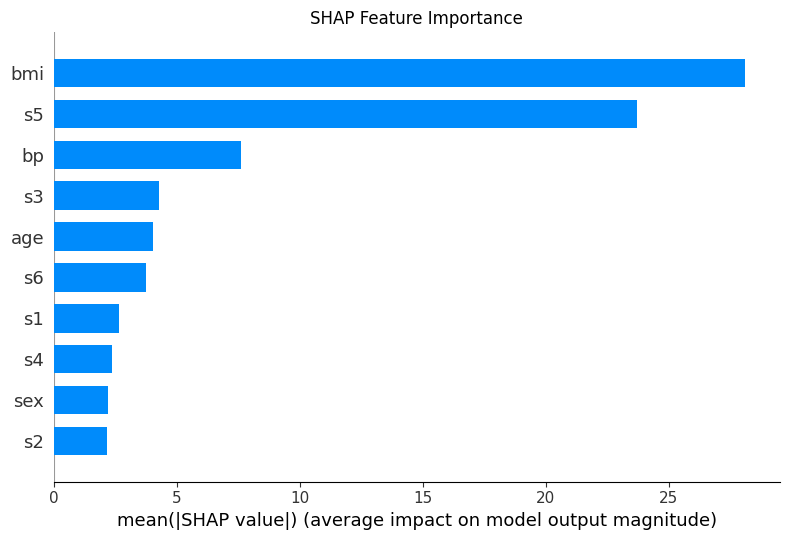

In [ ]:
# Create different types of SHAP plots

# 1. Summary Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("SHAP Feature Importance")
plt.tight_layout()
#plt.savefig('shap_summary.png')
#plt.close()
plt.show()


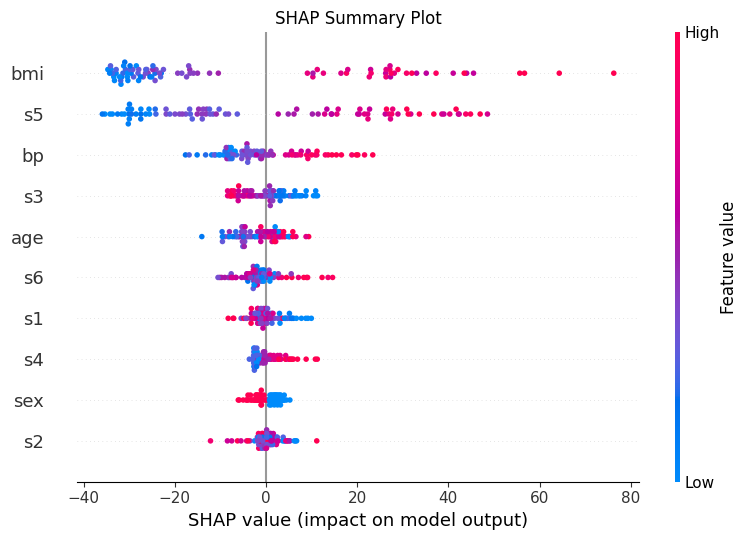

In [ ]:
# 2. Detailed Summary Plot (with feature values)
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("SHAP Summary Plot")
plt.tight_layout()
plt.savefig('shap_detailed.png')
plt.show()



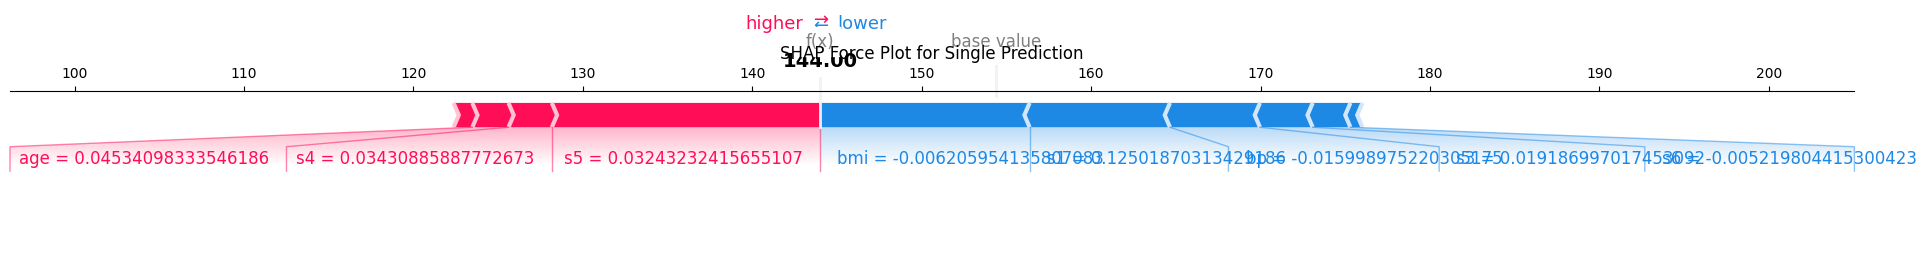

In [ ]:
# 3. Force Plot for a single prediction
# Convert to dense format for visualization
shap.force_plot(explainer.expected_value,
                shap_values[0,:],
                X_test.iloc[0,:],
                show=False,
                matplotlib=True)
plt.title("SHAP Force Plot for Single Prediction")
plt.tight_layout()
plt.savefig('shap_force.png')
plt.show()



In [ ]:
# 4. Calculate and print average impact of each feature
feature_importance = pd.DataFrame({
    'feature': X_test.columns,
    'absolute_shap_value': np.abs(shap_values).mean(0)
})
feature_importance = feature_importance.sort_values('absolute_shap_value', ascending=False)

print("\nFeature Importance based on average absolute SHAP values:")
print(feature_importance)




Feature Importance based on average absolute SHAP values:
  feature  absolute_shap_value
2     bmi            28.125856
8      s5            23.714497
3      bp             7.598716
6      s3             4.267196
0     age             4.043974
9      s6             3.762586
4      s1             2.635385
7      s4             2.383782
1     sex             2.211681
5      s2             2.176987


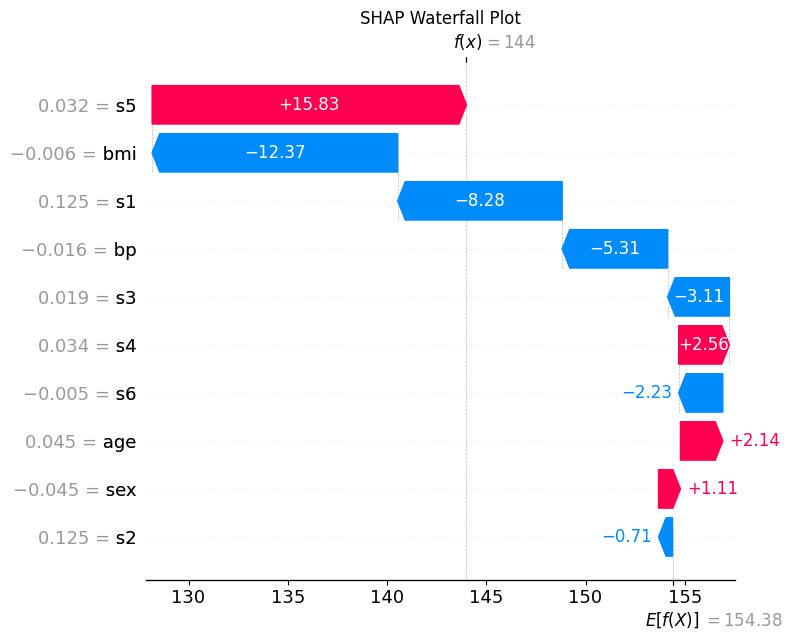

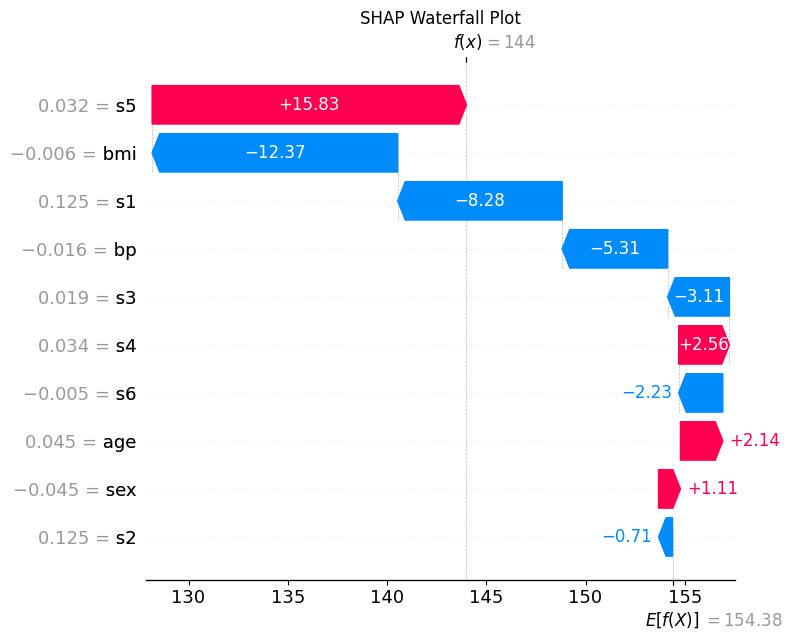

In [ ]:
# 5. Create a waterfall plot for a specific instance
instance_index = 0
# Convert to Explanation object for waterfall plot
explanation = shap.Explanation(values=shap_values[instance_index:instance_index+1],
                             base_values=np.array([explainer.expected_value]),
                             data=X_test.iloc[instance_index:instance_index+1].values,
                             feature_names=X_test.columns)

plt.figure(figsize=(10, 6))
shap.waterfall_plot(explanation[0], show=False)
plt.title("SHAP Waterfall Plot")
plt.tight_layout()
plt.savefig('shap_waterfall.png')
plt.show()



<Figure size 1000x1000 with 0 Axes>

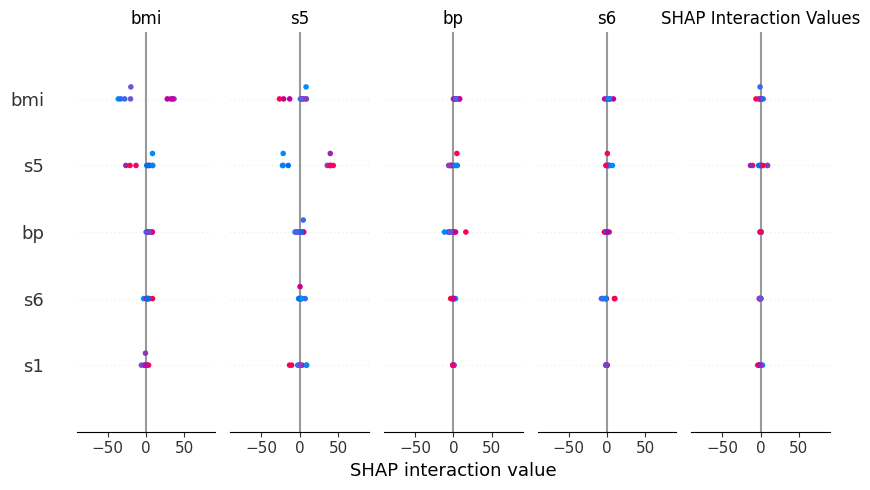

In [ ]:
# 6. Analyze feature interactions
shap_interaction_values = explainer.shap_interaction_values(X_test.iloc[:10])
plt.figure(figsize=(10, 10))
shap.summary_plot(shap_interaction_values, X_test.iloc[:10], max_display=5, show=False)
plt.title("SHAP Interaction Values")
plt.tight_layout()
plt.savefig('shap_interaction.png')
plt.show()



In [ ]:
# Print detailed analysis for first prediction
print("\nDetailed analysis of first prediction:")
base_value = explainer.expected_value
prediction = base_value[0] + shap_values[0].sum()
print(f"Base value: {base_value[0]:.2f}")
print(f"Final prediction: {prediction:.2f}")
print(f"Actual value: {y_test[0]:.2f}")

# Print individual feature contributions for first prediction
feature_contributions = pd.DataFrame({
    'feature': X_test.columns,
    'shap_value': shap_values[0],
    'feature_value': X_test.iloc[0].values
})
feature_contributions = feature_contributions.sort_values('shap_value', ascending=False)
print("\nFeature contributions for first prediction:")
print(feature_contributions)


Detailed analysis of first prediction:
Base value: 154.38
Final prediction: 144.00
Actual value: 219.00

Feature contributions for first prediction:
  feature  shap_value  feature_value
8      s5   15.832981       0.032432
7      s4    2.559244       0.034309
0     age    2.135133       0.045341
1     sex    1.105514      -0.044642
5      s2   -0.706445       0.125198
9      s6   -2.227117      -0.005220
6      s3   -3.113193       0.019187
3      bp   -5.313153      -0.015999
4      s1   -8.283744       0.125019
2     bmi  -12.369702      -0.006206
